**Assignment 3: Evaluating Classification Models**

Group 3: Laura Fanelli, Mark Schieble, John Vaughan, Katie Zink

Data Preparation, Exploration & Visualization

In [ ]:
#import packages  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#raw data from Katie's github

path_test = 'https://raw.githubusercontent.com/Sally-bear/msds-422-sharing/master/test.csv'
df_test = pd.read_csv(path_test, error_bad_lines=False)
# Dataset is now stored in a Pandas Dataframe

path_train = 'https://raw.githubusercontent.com/Sally-bear/msds-422-sharing/master/train.csv'
df_train = pd.read_csv(path_train, error_bad_lines=False)


In [ ]:
#lets take a look at the data
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
#Ensure that the test data is similar to the training set 
df_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [ ]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


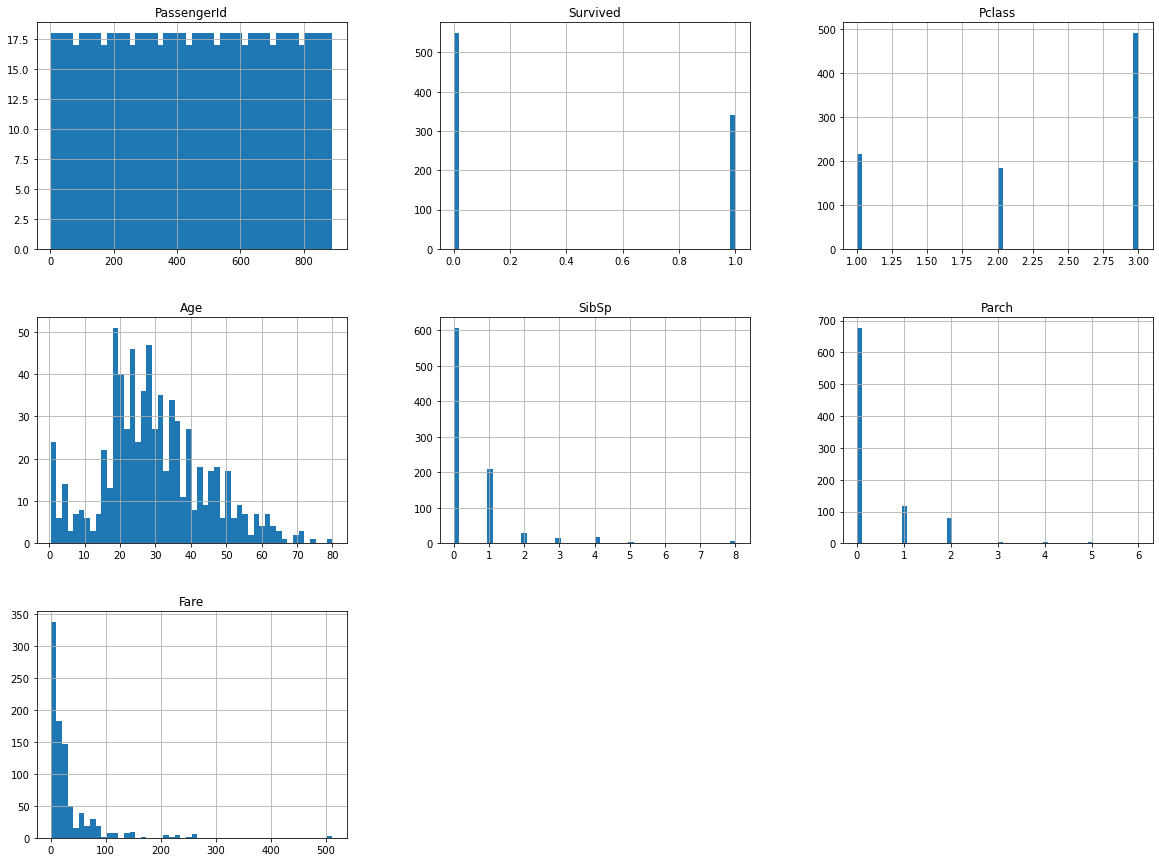

In [ ]:
#histogram of each numerical attribute
%matplotlib inline 
import matplotlib.pyplot as plt
df_train.hist(bins=50, figsize=(20,15))
plt.show()

**Correcting for Missing Age Values**

In [ ]:
#how do we fill the missing age and cabin data? Does the notebook below look like a good solution?
#reference article 
# """ 
# https://www.kaggle.com/allohvk/titanic-missing-age-imputation-tutorial-advanced

# """

In [ ]:
#vizualize missing data 
#exists under Age 
print('Missing values Percentage: \n\n', round (df_train.isnull().sum().sort_values(ascending=False)/len(df_train)*100,1))

Missing values Percentage: 

 Cabin          77.1
Age            19.9
Embarked        0.2
Fare            0.0
Ticket          0.0
Parch           0.0
SibSp           0.0
Sex             0.0
Name            0.0
Pclass          0.0
Survived        0.0
PassengerId     0.0
dtype: float64


In [ ]:
#computing the mean value for children 
print(df_train[df_train.Name.str.contains('Master')]['Age'].mean())

4.574166666666667


In [ ]:
#extract title from all names to identify which age group they belong to 
df_train['Title'], df_test['Title'] = [df.Name.str.extract \
        (' ([A-Za-z]+)\.', expand=False) for df in [df_train, df_test]]

In [ ]:
#print the avg age cross Titles and Pclass
df_train.groupby(['Title', 'Pclass'])['Age'].agg(['mean', 'count'])

mean  count
Title    Pclass                  
Capt     1       70.000000      1
Col      1       58.000000      2
Countess 1       33.000000      1
Don      1       40.000000      1
Dr       1       43.750000      4
         2       38.500000      2
Jonkheer 1       38.000000      1
Lady     1       48.000000      1
Major    1       48.500000      2
Master   1        5.306667      3
         2        2.258889      9
         3        5.350833     24
Miss     1       30.000000     45
         2       22.390625     32
         3       16.123188     69
Mlle     1       24.000000      2
Mme      1       24.000000      1
Mr       1       41.580460     87
         2       32.768293     82
         3       28.724891    229
Mrs      1       40.882353     34
         2       33.682927     41
         3       33.515152     33
Ms       2       28.000000      1
Rev      2       43.166667      6
Sir      1       49.000000      1

In [ ]:
TitleDict = {"Capt": "Officer","Col": "Officer","Major": "Officer","Jonkheer": "Royalty", \
             "Don": "Royalty", "Sir" : "Royalty","Dr": "Royalty","Rev": "Royalty", \
             "Countess":"Royalty", "Mme": "Mrs", "Mlle": "Miss", "Ms": "Mrs","Mr" : "Mr", \
             "Mrs" : "Mrs","Miss" : "Miss","Master" : "Master","Lady" : "Royalty"}

In [ ]:
#mapping of the Title col to the corresponding value in the dictionary and retreieve the set of consolidated Titles in 1 simple line of code.
df_train['Title'], df_test['Title'] = [df.Title.map(TitleDict) for df in [df_train, df_test]]

#reprint the groups
df_train.groupby(['Title', 'Pclass'])['Age'].agg(['mean', 'count'])

mean  count
Title   Pclass                  
Master  1        5.306667      3
        2        2.258889      9
        3        5.350833     24
Miss    1       29.744681     47
        2       22.390625     32
        3       16.123188     69
Mr      1       41.580460     87
        2       32.768293     82
        3       28.724891    229
Mrs     1       40.400000     35
        2       33.547619     42
        3       33.515152     33
Officer 1       56.600000      5
Royalty 1       42.555556      9
        2       42.000000      8

In [ ]:
#making sure all titles are accounted for 
display(df_train[df_train.Title.isnull()])
display(df_test[df_test.Title.isnull()])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,NaN


In [ ]:
##There is Dona which is royalty which is not covered in test_data. Update the same
df_test.at[414,'Title'] = 'Royalty'

In [ ]:
#validating Dona title was corrected 
display(df_test[df_test.Title.isnull()])

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


In [ ]:
#fill in missing age values with the mean for the age group based on title
[df_train['Age'].fillna(df_train.groupby(['Pclass','Sex','Title'])['Age'].transform('mean'), inplace=True) for df in [df_train, df_test]]
[df_test['Age'].fillna(df_test.groupby(['Pclass','Sex','Title'])['Age'].transform('mean'), inplace=True) for df in [df_train, df_test]]

[None, None]

In [ ]:
#validate age group has been corrected in both train and test sets
# print('Missing values Percentage: \n\n', round (df_train.isnull().sum().sort_values(ascending=False)/len(df_train)*100,1))
# print('Missing values Percentage: \n\n', round (df_test.isnull().sum().sort_values(ascending=False)/len(df_test)*100,1))

**Correct for Cabin Missing Values**


In [ ]:
#Drop Cabin attribute since majority have null values

del df_train['Cabin']
del df_test['Cabin']

In [ ]:
# #seeing which class has missing cabin values
# df_train.loc[df_train['Cabin'].isnull()].groupby(['Pclass']).count()

In [ ]:
# all first class people have a cabin
# df_train.loc[(df_train['Cabin'].isnull()) & (df_train['Pclass'] == 1), 'Cabin'].count()

# missing cabins in class 2-3
# df_train.loc[(df_train['Cabin'].notnull()) & (df_train['Pclass'] == 2), 'Cabin'].count()
# df_train.loc[(df_train['Cabin'].notnull()) & (df_train['Pclass'] == 3), 'Cabin'].count()

#replace missing cabins with N 
# df_train.loc[df_train['Cabin'].isnull() , 'Cabin'] = 'N'
# df_test.loc[df_test['Cabin'].isnull() , 'Cabin'] = 'N'

**Cleaning the Name Column**

In [ ]:
# Drop name attribute as it has not predictive value
del df_train['Name']
del df_test['Name']

In [ ]:
#clean up name to just last name for potential grouping by family 
# df_train[['LastName','Junk']] = df_train['Name'].str.split(',',expand=True)
# df_test[['LastName','Junk']] = df_test['Name'].str.split(',',expand=True)

In [ ]:
# df_train.drop(['Name','Junk'], inplace=True, axis = 1)
# df_train.head()

In [ ]:
# df_test.drop(['Name','Junk'], inplace=True, axis = 1)
# df_test.head()

**Convert Categorical Variables to Binary Variables using One Hot Encoding**

In [ ]:
#drop title and ticket attributes since they have no predictive value

del df_train['Title']
del df_test['Title']

del df_train['Ticket']
del df_test['Ticket']

In [ ]:
#drop PassengerId attribute since it has no predictive value

del df_train['PassengerId']
del df_test['PassengerId']

In [ ]:
#convert categorical variables using one hot encoding 
features=['Sex','Embarked','Pclass']
df_train=pd.get_dummies(df_train, columns=features, drop_first=True)
df_test=pd.get_dummies(df_test, columns=features, drop_first=True)

In [ ]:
df_train.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q',
       'Embarked_S', 'Pclass_2', 'Pclass_3'],
      dtype='object')

In [ ]:
# from sklearn.preprocessing import LabelEncoder

In [ ]:
# def encodeLabels(cols):
#     for col in cols:
#         le = LabelEncoder()
#         le = le.fit(df_train[col].values)
#         df_train[col] = le.transform(df_train[col].values)
#         le = LabelEncoder()
#         le = le.fit(df_test[col].values)
#         df_test[col] = le.transform(df_test[col].values)

In [ ]:
# features = ['LastName', 'Cabin']

In [ ]:
# encodeLabels(features)

In [ ]:
df_train.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [ ]:
df_test.head()

,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,34.5,0,0,7.8292,1,1,0,0,1
1,47.0,1,0,7.0000,0,0,1,0,1
2,62.0,0,0,9.6875,1,1,0,1,0
3,27.0,0,0,8.6625,1,0,1,0,1
4,22.0,1,1,12.2875,0,0,1,0,1


In [ ]:
#correlation matrix to determine features
corr_matrix = df_train.corr()
corr_matrix["Survived"].sort_values(ascending=False)
#Model Features
#Fare
#Embarked_S (binary requirement 1)
#Cabin
#Pclass_3 (binary requirement 2)
#Sex_male (binary requirement 3)
#Pclass_2 (binary requirement 4)
#Age

Survived      1.000000
Fare          0.257307
Pclass_2      0.093349
Parch         0.081629
Embarked_Q    0.003650
SibSp        -0.035322
Age          -0.076936
Embarked_S   -0.155660
Pclass_3     -0.322308
Sex_male     -0.543351
Name: Survived, dtype: float64

In [ ]:
# columns_to_drop = ['Parch', 'Embarked_Q', 'PassengerId', 'SibSp','LastName','Title','Ticket'] 

In [ ]:
# df_train = df_train.drop(columns_to_drop, 1)
# df_test = df_test.drop(columns_to_drop, 1)

In [ ]:
#split the data into a test and train datasets. Survived is the y variable. 
from sklearn.model_selection import train_test_split

X = df_train.drop(['Survived'], axis=1)
y = df_train['Survived'].values
X_train, X_val, y_train, y_val = train_test_split(X, y)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 224 to 849
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         668 non-null    float64
 1   SibSp       668 non-null    int64  
 2   Parch       668 non-null    int64  
 3   Fare        668 non-null    float64
 4   Sex_male    668 non-null    uint8  
 5   Embarked_Q  668 non-null    uint8  
 6   Embarked_S  668 non-null    uint8  
 7   Pclass_2    668 non-null    uint8  
 8   Pclass_3    668 non-null    uint8  
dtypes: float64(2), int64(2), uint8(5)
memory usage: 29.4 KB


**Classification Models**

In [ ]:
#This may be a helpful notebook
"""
https://www.kaggle.com/mnassrib/titanic-logistic-regression-with-python

Binary logistic regression - https://www.kaggle.com/heptapod/binary-logistic-regression
 - https://www.kaggle.com/hamelg/python-for-data-28-logistic-regression
"""

'\nhttps://www.kaggle.com/mnassrib/titanic-logistic-regression-with-python\n\nBinary logistic regression - https://www.kaggle.com/heptapod/binary-logistic-regression\n - https://www.kaggle.com/hamelg/python-for-data-28-logistic-regression\n'

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

## **Logistic Regression** 

In [ ]:
# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_val)
y_pred_proba = logreg.predict_proba(X_val)[:, 1]
[fpr, tpr, thr] = roc_curve(y_val, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_val, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_val, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

Train/Test split results:
LogisticRegression accuracy is 0.821
LogisticRegression log_loss is 0.410
LogisticRegression auc is 0.863


In [ ]:
#MARK'S CODE

# check classification scores of logistic regression
logreg = LogisticRegression()
logModel = logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_val)
y_pred_proba = logreg.predict_proba(X_val)[:, 1]
[fpr, tpr, thr] = roc_curve(y_val, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_val, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_val, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

Train/Test split results:
LogisticRegression accuracy is 0.821
LogisticRegression log_loss is 0.410
LogisticRegression auc is 0.863


In [ ]:
#MARK'S CODE

print(logModel.coef_, logModel.intercept_)

[[-0.03442276 -0.36951567  0.05343199  0.00287873 -2.43597513 -0.12556735
  -0.51986892 -0.74073781 -1.86977265]] [3.67864569]


In [ ]:
#MARK'S CODE

mylogreg = LogisticRegression().fit(X_train,y_train)
mylogreg

print("Training set score: {:.3f}".format(mylogreg.score(X_train,y_train)))
print("Test set score: {:.3f}".format(mylogreg.score(X_val,y_val)))

import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Training set score: 0.796
Test set score: 0.821
Optimization terminated successfully.
         Current function value: 0.487209
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  891
Model:                          Logit   Df Residuals:                      882
Method:                           MLE   Df Model:                            8
Date:                Sun, 04 Oct 2020   Pseudo R-squ.:                  0.2684
Time:                        17:28:36   Log-Likelihood:                -434.10
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 4.851e-64
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age            0.0030      0.006      0.538      0.591      

**ROC Curve**

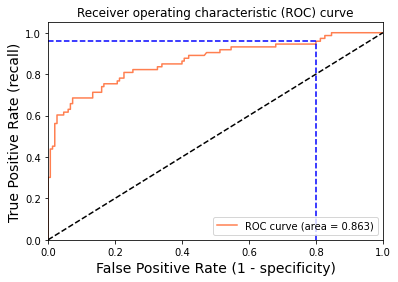

Using a threshold of 0.108 guarantees a sensitivity of 0.959 and a specificity of 0.200, i.e. a false positive rate of 80.00%.


In [ ]:
idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

**Cross-Validation**

In [ ]:
def cross_validate(estimator, train, validation):
    X_train = train[0]
    Y_train = train[1]
    X_val = validation[0]
    Y_val = validation[1]
    train_predictions = logreg.predict(X_train)
    train_accuracy = accuracy_score(train_predictions, Y_train)
    train_recall = recall_score(train_predictions, Y_train)
    train_precision = precision_score(train_predictions, Y_train)

    val_predictions = logreg.predict(X_val)
    val_accuracy = accuracy_score(val_predictions, Y_val)
    val_recall = recall_score(val_predictions, Y_val)
    val_precision = precision_score(val_predictions, Y_val)

    print('Model metrics')
    print('Accuracy  Train: %.2f, Validation: %.2f' % (train_accuracy, val_accuracy))
    print('Recall    Train: %.2f, Validation: %.2f' % (train_recall, val_recall))
    print('Precision Train: %.2f, Validation: %.2f' % (train_precision, val_precision))

cross_validate(logreg, (X_train, y_train), (X_val, y_val))

Model metrics
Accuracy  Train: 0.80, Validation: 0.82
Recall    Train: 0.77, Validation: 0.75
Precision Train: 0.70, Validation: 0.68


**Confusion Matrix**


In [ ]:
confusion_matrix(y_val, y_pred)

array([[133,  17],
       [ 23,  50]])

## **naive Bayes Classification**

In [ ]:
#naïve Bayes classification
from sklearn.naive_bayes import GaussianNB

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_val)
y_pred_proba = classifier.predict_proba(X_val)[:, 1]
[fpr, tpr, thr] = roc_curve(y_val, y_pred_proba)
print('Train/Test split results:')
print(classifier.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_val, y_pred))
print(classifier.__class__.__name__+" log_loss is %2.3f" % log_loss(y_val, y_pred_proba))
print(classifier.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

Train/Test split results:
GaussianNB accuracy is 0.794
GaussianNB log_loss is 0.623
GaussianNB auc is 0.826


**ROC Curve**

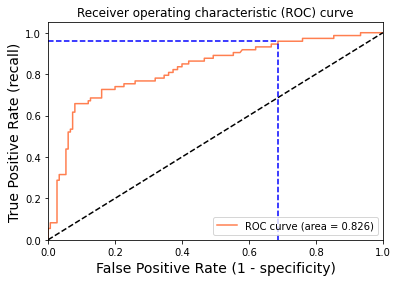

Using a threshold of 0.031 guarantees a sensitivity of 0.959 and a specificity of 0.313, i.e. a false positive rate of 68.67%.


In [ ]:
idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

**Cross-Validation**

In [ ]:
def cross_validate(estimator, train, validation):
    X_train = train[0]
    Y_train = train[1]
    X_val = validation[0]
    Y_val = validation[1]
    train_predictions = classifier.predict(X_train)
    train_accuracy = accuracy_score(train_predictions, Y_train)
    train_recall = recall_score(train_predictions, Y_train)
    train_precision = precision_score(train_predictions, Y_train)

    val_predictions = classifier.predict(X_val)
    val_accuracy = accuracy_score(val_predictions, Y_val)
    val_recall = recall_score(val_predictions, Y_val)
    val_precision = precision_score(val_predictions, Y_val)

    print('Model metrics')
    print('Accuracy  Train: %.2f, Validation: %.2f' % (train_accuracy, val_accuracy))
    print('Recall    Train: %.2f, Validation: %.2f' % (train_recall, val_recall))
    print('Precision Train: %.2f, Validation: %.2f' % (train_precision, val_precision))

cross_validate(classifier, (X_train, y_train), (X_val, y_val))

Model metrics
Accuracy  Train: 0.79, Validation: 0.79
Recall    Train: 0.75, Validation: 0.68
Precision Train: 0.71, Validation: 0.68


**Confusion Matrix**

In [ ]:
confusion_matrix(y_val, y_pred)

array([[127,  23],
       [ 23,  50]])

In [ ]:
print('Probability of each class')
print('Survive = 0: %.2f' % classifier.class_prior_[0])
print('Survive = 1: %.2f' % classifier.class_prior_[1])

Probability of each class
Survive = 0: 0.60
Survive = 1: 0.40


In [ ]:
print('Mean of each feature per class')
print('Survive = 0: %s' % classifier.theta_[0])
print('Survive = 1: %s' % classifier.theta_[1])

Mean of each feature per class
Survive = 0: [30.23664023  0.54135338  0.29323308 21.96832607  0.84962406  0.0802005
  0.78195489  0.18796992  0.67418546]
Survive = 1: [28.2561029   0.46840149  0.4795539  47.58378253  0.31598513  0.08550186
  0.63568773  0.27137546  0.34572491]
